neural_network

# Custom Feedforward Network

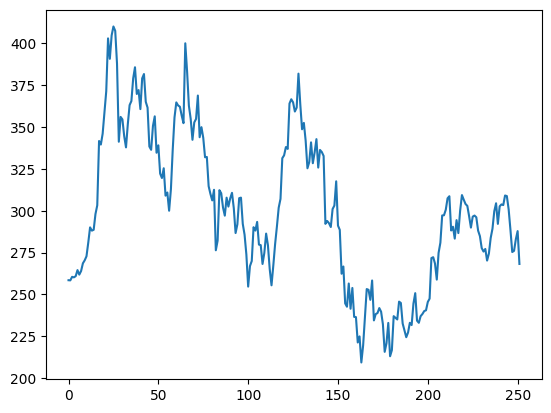

In [3]:
from pandas import read_csv
from datetime import datetime
from pandas.plotting import autocorrelation_plot
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, LSTM
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping


# Ensure eager execution
tf.config.run_functions_eagerly(True)

# Suppress all warnings
import warnings
warnings.filterwarnings('ignore')

def parser(x):
	return datetime.strptime(x,'%Y-%m-%d')

series = read_csv('data/cleaned_data_bert.csv', header=0, parse_dates=[0], index_col=0)

# Filter rows where "Stock Name" is 'TLSA'
series = series[series['Stock Name'] == 'TSLA']
series = series.drop(['Stock Name', 'Adj Close'], axis=1)
series["Close"].plot()
plt.show()

In [4]:
# autocorrelation_plot(series)
# plt.show()

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.9551
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.7767
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.5516
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.3634
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2609
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2399
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1780
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.1993
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.1667
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.1376
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1246
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.1780
Epoch 13/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.1158
Epoch 14/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.1519
Epoch 15/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.1389
Epoch 16/100
7/7 ━━

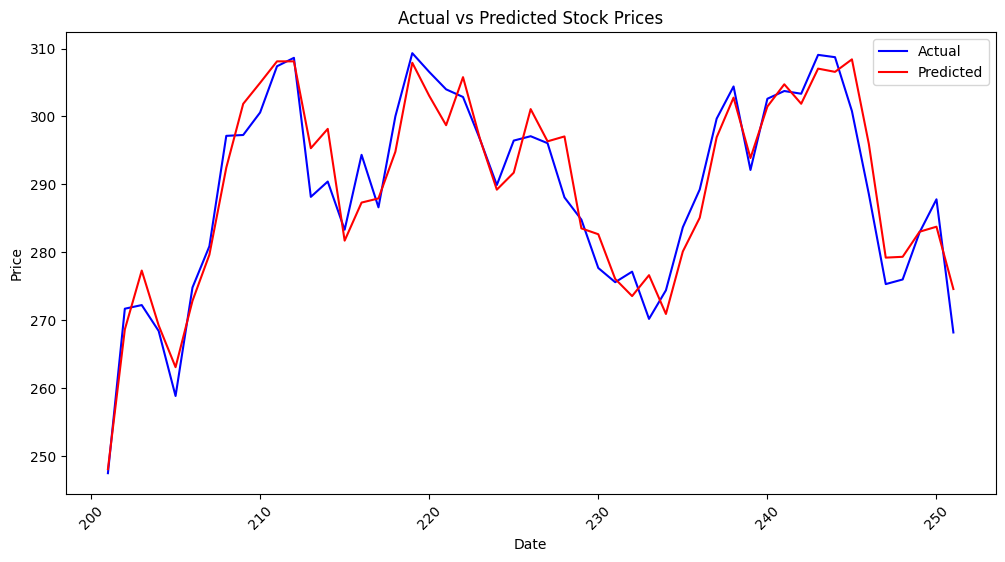

Mean Squared Error: 16.271384769823747


In [5]:
# Define the target variable (y) and the features (X)
y = series['Close']
X = series.drop(['Close', 'Date'], axis=1)  # Drop 'Date' from the features

# Split into train and test (80% train, 20% test)
train_size = int(len(series) * 0.8)  # 80% for training
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Scale the features (X) using StandardScaler
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Scale the target variable (y) using StandardScaler
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))  # Reshape for compatibility
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# Define the model
model = Sequential()
model.add(Dense(units=32, activation='relu', input_dim=X_train_scaled.shape[1]))  # Fewer units
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train_scaled, epochs=100, batch_size=32)

# Predict on the test data (predictions are scaled)
forecast_scaled = model.predict(X_test_scaled)

# Reshape forecast to 1D
forecast_scaled = forecast_scaled.reshape(-1)

# Inverse transform the forecast to get original scale values
forecast = scaler_y.inverse_transform(forecast_scaled.reshape(-1, 1))

# Convert y_test to numpy for consistency with forecast
y_test_dates = y_test.index.to_numpy()

# Plot the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test_dates, y_test.values, label='Actual', color='blue')  # Actual values
plt.plot(y_test_dates, forecast, label='Predicted', color='red')  # Predicted values
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)  # Rotate date labels for readability
plt.show()

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, forecast)
print(f'Mean Squared Error: {mse}')


# CNN + LSTM

Epoch 1/20
5/5 - 4s - 871ms/step - loss: 0.9999 - val_loss: 0.0767
Epoch 2/20
5/5 - 2s - 492ms/step - loss: 0.6819 - val_loss: 0.0748
Epoch 3/20
5/5 - 1s - 248ms/step - loss: 0.6078 - val_loss: 0.0950
Epoch 4/20
5/5 - 1s - 231ms/step - loss: 0.5885 - val_loss: 0.0744
Epoch 5/20
5/5 - 1s - 253ms/step - loss: 0.4313 - val_loss: 0.0705
Epoch 6/20
5/5 - 1s - 264ms/step - loss: 0.4794 - val_loss: 0.0687
Epoch 7/20
5/5 - 1s - 285ms/step - loss: 0.3897 - val_loss: 0.0667
Epoch 8/20
5/5 - 3s - 526ms/step - loss: 0.4099 - val_loss: 0.0663
Epoch 9/20
5/5 - 2s - 438ms/step - loss: 0.4127 - val_loss: 0.1006
Epoch 10/20
5/5 - 1s - 255ms/step - loss: 0.3808 - val_loss: 0.0748
Epoch 11/20
5/5 - 1s - 251ms/step - loss: 0.3221 - val_loss: 0.1024
Epoch 12/20
5/5 - 1s - 247ms/step - loss: 0.3744 - val_loss: 0.0773
Epoch 13/20
5/5 - 1s - 240ms/step - loss: 0.2877 - val_loss: 0.0872
Epoch 14/20
5/5 - 1s - 246ms/step - loss: 0.2960 - val_loss: 0.1161
Epoch 15/20
5/5 - 1s - 265ms/step - loss: 0.3541 - val_lo

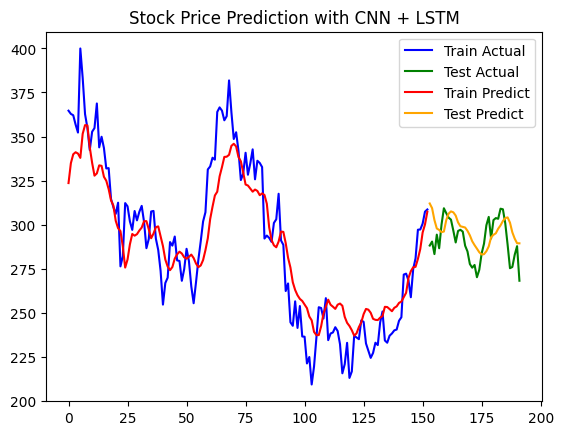

In [19]:
# Load data
def parser(x):
    return datetime.strptime(x, '%Y-%m-%d')

series = read_csv('data/cleaned_data_bert.csv', header=0, parse_dates=[0], index_col=0)
# Filter rows where "Stock Name" is 'TLSA'
series = series[series['Stock Name'] == 'TSLA']
series = series.drop(['Stock Name', 'Adj Close'], axis=1)

# Scale only the 'Close' price
scaler = StandardScaler()
scaled = scaler.fit_transform(series[['Close']].values)  # Scale only the 'Close' price

# Function to create data sequences for time-series forecasting
def create_dataset(data, look_back=60):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:i + look_back, 0])  # Use only 'Close' price
        y.append(data[i + look_back, 0])  # Predict the next 'Close' price
    return np.array(X), np.array(y)

# Prepare the data
look_back = 60
X, y = create_dataset(scaled, look_back)
X = X.reshape((X.shape[0], X.shape[1], 1))  # Reshape for CNN (samples, time steps, features)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Build the CNN + LSTM hybrid model
model = Sequential()

# CNN layers for feature extraction
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))

# LSTM layer for capturing temporal dependencies
model.add(LSTM(50, activation='relu'))

# Fully connected layer to output the predicted stock price
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.add(Dropout(0.2))

early_stop = EarlyStopping(monitor='val_loss', patience=10)

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=2, callbacks=[early_stop])

# Evaluate the model
mse = model.evaluate(X_test, y_test, verbose=0)
print(f"Mean Squared Error on Test Set: {mse}")

# Predict
y_pred = model.predict(X_test)

# Rescale predictions back to original scale using the same scaler
y_pred_rescaled = scaler.inverse_transform(y_pred)  # Rescale predictions
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))  # Rescale true values

# Plot the results
import matplotlib.pyplot as plt
plt.plot(range(len(y_train)), scaler.inverse_transform(y_train.reshape(-1, 1)), label='Train Actual', color='blue')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test_rescaled, label='Test Actual', color='green')

plt.plot(range(len(y_train)), scaler.inverse_transform(model.predict(X_train).reshape(-1, 1)), label='Train Predict', color='red')
plt.plot(range(len(y_train), len(y_train) + len(y_pred)), y_pred_rescaled, label='Test Predict', color='orange')

plt.title('Stock Price Prediction with CNN + LSTM')
plt.legend()
plt.show()


# LSTM using sequences

Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 12s 232ms/step - loss: 0.1117 - val_loss: 0.0074
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 21s 249ms/step - loss: 0.0206 - val_loss: 0.0060
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 213ms/step - loss: 0.0241 - val_loss: 0.0078
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 21s 224ms/step - loss: 0.0178 - val_loss: 0.0097
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 222ms/step - loss: 0.0165 - val_loss: 0.0050
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 12s 235ms/step - loss: 0.0178 - val_loss: 0.0058
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 217ms/step - loss: 0.0158 - val_loss: 0.0059
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 21s 234ms/step - loss: 0.0135 - val_loss: 0.0097
Epoch 9/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 222ms/step - loss: 0.0157 - val_loss: 0.0066
Epoch 10/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 12s 250ms/step - loss: 0.0112 - val_loss: 0.0076
Epoch 11/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 19s 230ms/step - loss: 0.0138 - val_loss: 0.0053
Epoch 12/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 12

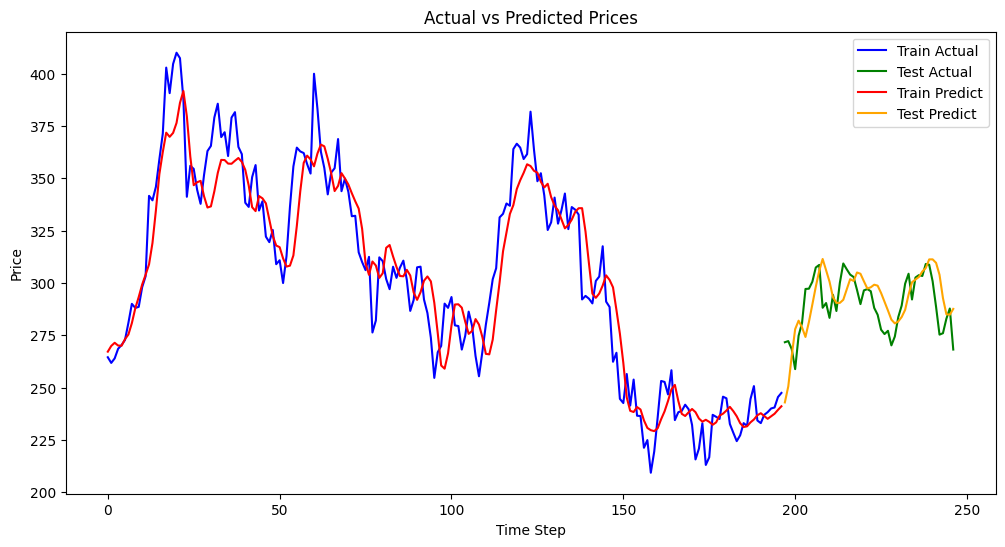

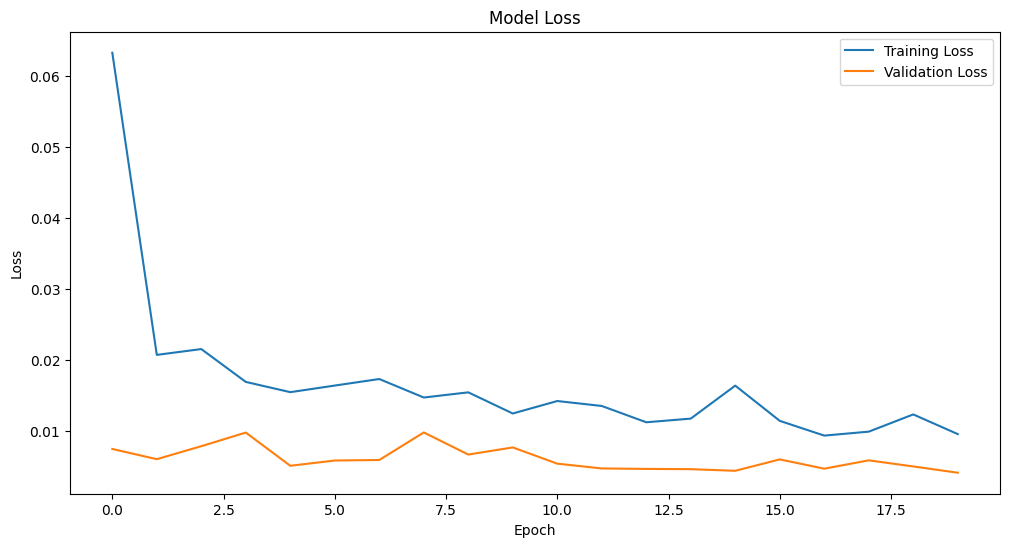

In [28]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error
from tensorflow.keras.callbacks import EarlyStopping
from datetime import datetime

# Load data
def parser(x):
    return datetime.strptime(x, '%Y-%m-%d')

series = pd.read_csv('data/cleaned_data_bert.csv', header=0, parse_dates=[0], index_col=0)
# Filter rows where "Stock Name" is 'TLSA'
series = series[series['Stock Name'] == 'TSLA']
features = series.drop(['Stock Name', 'Adj Close', 'Date'], axis=1)
target = 'Close'

# Scale the features (X) using MinMaxScaler
scaler_X = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler_X.fit_transform(features)

# Scale the target variable (y) using MinMaxScaler
scaler_y = MinMaxScaler(feature_range=(0, 1))
y_scaled = scaler_y.fit_transform(series[[target]])

# Combine the scaled data to create the sequences
scaled_data = pd.DataFrame(X_scaled, columns=features.columns)
scaled_data[target] = y_scaled

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X_sequence = data.iloc[i:i+seq_length].values
        X.append(X_sequence)
        y.append(data.iloc[i + seq_length][target])
    return np.array(X), np.array(y)

# Hyperparameters
seq_length = 5  # Increased from 5 to 10

# Create sequences
X, y = create_sequences(scaled_data, seq_length)

# Reshape X for LSTM (samples, time steps, features)
X = X.reshape((X.shape[0], X.shape[1], X.shape[2]))

# Split into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model with increased complexity
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=4,
                    validation_data=(X_test, y_test), verbose=1,
                    callbacks=[early_stopping])

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Reverse scaling for predictions (only for 'Close' column)
train_predict = scaler_y.inverse_transform(train_predict.reshape(-1, 1))
test_predict = scaler_y.inverse_transform(test_predict.reshape(-1, 1))

# Reverse scaling for actual values
y_train_actual = scaler_y.inverse_transform(y_train.reshape(-1, 1))
y_test_actual = scaler_y.inverse_transform(y_test.reshape(-1, 1))

# Calculate MSE
train_mse = mean_squared_error(y_train_actual, train_predict)
test_mse = mean_squared_error(y_test_actual, test_predict)

print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')

# Plot actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_train_actual)), y_train_actual, label='Train Actual', color='blue')
plt.plot(range(len(y_train_actual), len(y_train_actual) + len(y_test_actual)), y_test_actual, label='Test Actual', color='green')
plt.plot(range(len(train_predict)), train_predict, label='Train Predict', color='red')
plt.plot(range(len(train_predict), len(train_predict) + len(test_predict)), test_predict, label='Test Predict', color='orange')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Time Step')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()